In [1]:
%load_ext lab_black

In [2]:
import os
import random
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

tf.random.set_seed(1)

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
for name in ["train", "test", "val"]:
    print(len(os.listdir(f"data-vol-1/data/{name}/CNV")))
    print(len(os.listdir(f"data-vol-1/data/{name}/DRUSEN")))
    print(len(os.listdir(f"data-vol-1/data/{name}/NORMAL")))
    print(len(os.listdir(f"data-vol-1/data/{name}/DME")))

37205
8616
26315
11348
242
242
242
242
8
8
8
8


In [4]:
base_dir = "./data-vol-1/data/"

train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")
val_dir = os.path.join(base_dir, "val")

train_dir_cnv = os.path.join(train_dir, "CNV")
train_dir_drusen = os.path.join(train_dir, "DRUSEN")
train_dir_normal = os.path.join(train_dir, "NORMAL")
train_dir_dme = os.path.join(train_dir, "DME")

test_dir_cnv = os.path.join(test_dir, "CNV")
test_dir_drusen = os.path.join(test_dir, "DRUSEN")
test_dir_normal = os.path.join(test_dir, "NORMAL")
test_dir_dme = os.path.join(test_dir, "DME")

val_dir_cnv = os.path.join(val_dir, "CNV")
val_dir_drusen = os.path.join(val_dir, "DRUSEN")
val_dir_normal = os.path.join(val_dir, "NORMAL")
val_dir_dme = os.path.join(val_dir, "DME")

train_normal_fnames = os.listdir(train_dir_normal)
train_drusen_fnames = os.listdir(train_dir_drusen)

In [5]:
pic_index = 3

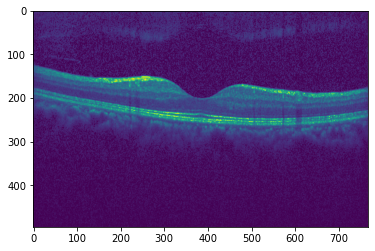

In [6]:
img_path = os.path.join(train_dir_normal, train_normal_fnames[pic_index])

img = mpimg.imread(img_path)

plt.imshow(img)
plt.show()

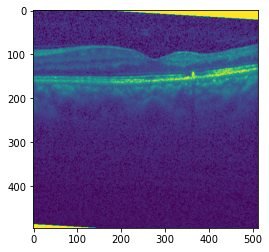

In [7]:
img_path = os.path.join(train_dir_drusen, train_drusen_fnames[pic_index])

img = mpimg.imread(img_path)

plt.imshow(img)
plt.show()

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1 / 150.0,
    shear_range=0.01,
    zoom_range=[0.9, 1.25],
    rotation_range=20,
    zca_whitening=True,
    vertical_flip=True,
    fill_mode="nearest",
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
)
test_datagen = ImageDataGenerator(rescale=1 / 150.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=16,
    target_size=(256, 256),
    #     color_mode="grayscale",
    class_mode="categorical",
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    batch_size=16,
    target_size=(256, 256),
    #     color_mode="grayscale",
    class_mode="categorical",
)

Found 83484 images belonging to 4 classes.
Found 968 images belonging to 4 classes.


In [31]:
model = keras.Sequential(
    [
        keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(256, 256, 3)),
        keras.layers.MaxPooling2D(2, 2),
        #         keras.layers.Dropout(0.3)
        keras.layers.Conv2D(32, (3, 3), activation="relu"),
        keras.layers.MaxPooling2D(2, 2),
        #         keras.layers.Dropout(0.3)
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation="relu"),
        keras.layers.Dense(4, activation="softmax"),
    ]
)

In [32]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               62980608  
_________________________________________________________________
dense_11 (Dense)             (None, 4)                

In [33]:
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=epochs,
    shuffle=True,
    steps_per_epoch=250,
    batch_size=32,
)

Epoch 1/15
250/250 [==============================] - 87s 346ms/step - loss: 1.7070 - accuracy: 0.4285 - val_loss: 1.6686 - val_accuracy: 0.2500
Epoch 2/15
250/250 [==============================] - 86s 343ms/step - loss: 1.2205 - accuracy: 0.4502 - val_loss: 1.4925 - val_accuracy: 0.2500
Epoch 3/15
250/250 [==============================] - 86s 345ms/step - loss: 1.2241 - accuracy: 0.4512 - val_loss: 1.6091 - val_accuracy: 0.2500
Epoch 4/15
250/250 [==============================] - 86s 345ms/step - loss: 1.2254 - accuracy: 0.4563 - val_loss: 1.6458 - val_accuracy: 0.2634
Epoch 5/15
250/250 [==============================] - 88s 351ms/step - loss: 1.2010 - accuracy: 0.4820 - val_loss: 1.5849 - val_accuracy: 0.2676
Epoch 6/15
250/250 [==============================] - 87s 346ms/step - loss: 1.1566 - accuracy: 0.5328 - val_loss: 1.4542 - val_accuracy: 0.4122
Epoch 7/15
250/250 [==============================] - 86s 346ms/step - loss: 1.1031 - accuracy: 0.5765 - val_loss: 1.3360 - val_ac

Text(0.5, 1.0, 'Training and validation loss')

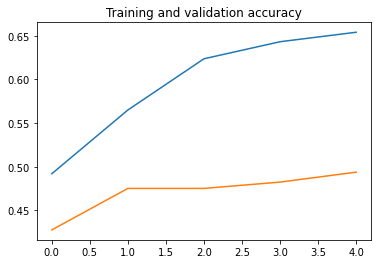

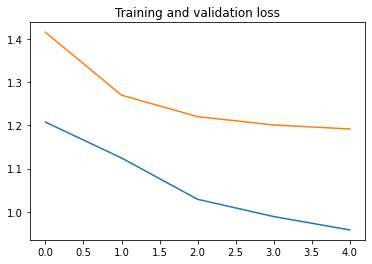

In [20]:
# -----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
# -----------------------------------------------------------
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))  # Get number of epochs

# ------------------------------------------------
# Plot training and validation accuracy per epoch
# ------------------------------------------------
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title("Training and validation accuracy")
plt.figure()

# ------------------------------------------------
# Plot training and validation loss per epoch
# ------------------------------------------------
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title("Training and validation loss")